Notes about understanding the code:
"grafana_data_export oct_fftcb.csv"
    
    oct -> october 6th plant
    fft -> fast fourier transform
    cb -> continuous bond
    grafana -> visualization application thing
    
bands 0-7
    different vibration frequencies, running concurrently
    band 3 was frequency to which they were concerned

codes
    see Diego Batista - Final Presentation slide 9


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#import scipy.fftpack

# plt.rcParams["figure.figsize"] = (15,7.5)
# plt.rcParams.update({'font.size': 20})
# plt.rcParams["legend.fontsize"] = (15)

In [3]:
fft = pd.read_csv('data/grafana_data_export oct_fftcb.csv', sep=';', engine='python', header=1)
fft['Time'] = fft.Time.str[11:19]
fft
#fft = pd.read_excel('grafana_data_export oct_fftcb_notscaled_excel.xlsx',  sheet_name='grafana_data_export oct_fftcb_n')

,Series,Time,Value
0,CB FFT Band 0,09:12:20,0.000160
1,CB FFT Band 0,09:12:20,0.000186
2,CB FFT Band 0,09:12:20,0.000144
3,CB FFT Band 0,09:12:20,0.000226
4,CB FFT Band 0,09:12:20,0.000157
...,...,...,...
230663,CB FFT Band 7,17:13:00,0.000260
230664,CB FFT Band 7,17:13:00,0.000209
230665,CB FFT Band 7,17:13:00,0.000328
230666,CB FFT Band 7,17:13:10,0.000328


In [4]:
# Get each band 
fft_band0 = fft.loc[fft["Series"] == "CB FFT Band 0"]
fft_band1 = fft.loc[fft["Series"] == "CB FFT Band 1"]
fft_band2 = fft.loc[fft["Series"] == "CB FFT Band 2"]
fft_band3 = fft.loc[fft["Series"] == "CB FFT Band 3"]
fft_band4 = fft.loc[fft["Series"] == "CB FFT Band 4"]
fft_band5 = fft.loc[fft["Series"] == "CB FFT Band 5"]
fft_band6 = fft.loc[fft["Series"] == "CB FFT Band 6"]
fft_band7 = fft.loc[fft["Series"] == "CB FFT Band 7"]

fft_band0 = fft_band0.reset_index(drop=True)
fft_band1 = fft_band1.reset_index(drop=True)
fft_band2 = fft_band2.reset_index(drop=True)
fft_band3 = fft_band3.reset_index(drop=True)
fft_band4 = fft_band4.reset_index(drop=True)
fft_band5 = fft_band5.reset_index(drop=True)
fft_band6 = fft_band6.reset_index(drop=True)
fft_band7 = fft_band7.reset_index(drop=True)

In [5]:
print("Indexes for B1:")
print(fft_band0.index[fft_band0['Time'] == '09:25:50'])
print(fft_band0.index[fft_band0['Time'] == '09:30:50'])
#print("Indexes for B2:")
fft_band0.index[fft_band0['Time'] == '09:37:00']
fft_band0.index[fft_band0['Time'] == '09:41:40']
#print("Indexes for B3:")
fft_band0.index[fft_band0['Time'] == '09:56:00']
fft_band0.index[fft_band0['Time'] == '10:00:40']
#print("Indexes for A1:");
fft_band0.index[fft_band0['Time'] == '16:00:00']
fft_band0.index[fft_band0['Time'] == '16:02:00']
#print("Indexes for A2:");
fft_band0.index[fft_band0['Time'] == '16:10:00']
fft_band0.index[fft_band0['Time'] == '16:14:00']
#print("Indexes for A3:");
fft_band0.index[fft_band0['Time'] == '16:19:00']
fft_band0.index[fft_band0['Time'] == '16:22:10']
#print("Indexes for A4:");
fft_band0.index[fft_band0['Time'] == '16:24:20']
fft_band0.index[fft_band0['Time'] == '16:28:00']
#print("Indexes for A5:");
fft_band0.index[fft_band0['Time'] == '16:31:30']
fft_band0.index[fft_band0['Time'] == '16:36:50']
#print("Indexes for A6:");
fft_band0.index[fft_band0['Time'] == '16:45:20']
fft_band0.index[fft_band0['Time'] == '16:50:50']
#print("Indexes for A7:");
fft_band0.index[fft_band0['Time'] == '16:57:10']
fft_band0.index[fft_band0['Time'] == '17:00:00']
#print("Indexes for A8:");
fft_band0.index[fft_band0['Time'] == '17:00:00']
fft_band0.index[fft_band0['Time'] == '17:05:30']

Indexes for B1:
Int64Index([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
            1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
            1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989],
           dtype='int64')
Int64Index([2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779,
            2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790,
            2791, 2792, 2793, 2794, 2795],
           dtype='int64')


Int64Index([28108, 28109, 28110, 28111, 28112], dtype='int64')

In [6]:
# B1 Ads
# {'Run Code': B1,
# 'Condition': Target,
# 'Pressure (Bar)': 2.3,
# 'Stiffener Kit': y,
# 'Notes': None}
b1_fft_band0 = fft_band0.iloc[1958:2720]
b1_fft_band1 = fft_band1.iloc[1950:2750]
b1_fft_band2 = fft_band2.iloc[1980:2750]
b1_fft_band3 = fft_band3.iloc[1969:2750]
b1_fft_band4 = fft_band4.iloc[1950:2750]
b1_fft_band5 = fft_band5.iloc[1950:2750]
b1_fft_band6 = fft_band6.iloc[1950:2750]
b1_fft_band7 = fft_band7.iloc[1950:2700]

# A1 Ads
# {'Run Code': A1,
# 'Condition': Target,
# 'Pressure (Bar)': 3.4,
# 'Stiffener Kit': n,
# 'Notes': None}
a1_fft_band0 = fft_band0.iloc[23149:23276]
a1_fft_band1 = fft_band1.iloc[23149:23270]
a1_fft_band2 = fft_band2.iloc[23300:23470]
a1_fft_band3 = fft_band3.iloc[23300:23470]
a1_fft_band4 = fft_band4.iloc[22900:23000]
a1_fft_band5 = fft_band5.iloc[23400:23500]
a1_fft_band6 = fft_band6.iloc[23149:23300]
a1_fft_band7 = fft_band7.iloc[22980:23200]

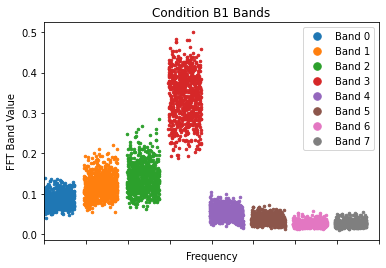

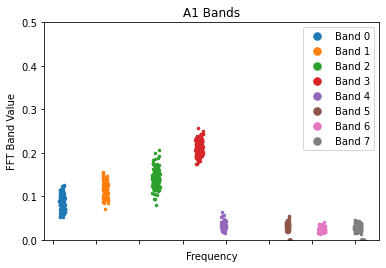

In [7]:
#B1
fig, ax = plt.subplots()
ax.set_xticklabels([])
plt.xlabel('Frequency')
plt.ylabel('FFT Band Value')
ax.set_xlim(0, 8000)

plt.plot(b1_fft_band0.index - 2000, b1_fft_band0['Value'], '.', markersize=5, label='Band 0')
plt.plot(b1_fft_band1.index - 1000, b1_fft_band1['Value'], '.', markersize=5, label='Band 1')
plt.plot(b1_fft_band2.index, b1_fft_band2['Value'], '.', markersize=5, label='Band 2')
plt.plot(b1_fft_band3.index + 1000, b1_fft_band3['Value'], '.', markersize=5, label='Band 3')
plt.plot(b1_fft_band4.index + 2000, b1_fft_band4['Value'], '.', markersize=5, label='Band 4')
plt.plot(b1_fft_band5.index + 3000, b1_fft_band5['Value'], '.', markersize=5, label='Band 5')
plt.plot(b1_fft_band6.index + 4000, b1_fft_band6['Value'], '.', markersize=5, label='Band 6')
plt.plot(b1_fft_band7.index + 5000, b1_fft_band7['Value'], '.', markersize=5, label='Band 7')

plt.title('Condition B1 Bands')
plt.legend(markerscale=3)

#A1
fig, ax = plt.subplots()
ax.set_ylim(0, 0.5)
ax.set_xticklabels([])
plt.xlabel('Frequency')
plt.ylabel('FFT Band Value')

plt.plot(a1_fft_band0.index - 2000, a1_fft_band0['Value'], '.', markersize=5, label='Band 0')
plt.plot(a1_fft_band1.index - 1000, a1_fft_band1['Value'], '.', markersize=5, label='Band 1')
plt.plot(a1_fft_band2.index, a1_fft_band2['Value'], '.', markersize=5, label='Band 2')
plt.plot(a1_fft_band3.index + 1000, a1_fft_band3['Value'], '.', markersize=5, label='Band 3')
plt.plot(a1_fft_band4.index + 2000, a1_fft_band4['Value'], '.', markersize=5, label='Band 4')
plt.plot(a1_fft_band5.index + 3000, a1_fft_band5['Value'], '.', markersize=5, label='Band 5')
plt.plot(a1_fft_band6.index + 4000, a1_fft_band6['Value'], '.', markersize=5, label='Band 6')
plt.plot(a1_fft_band7.index + 5000, a1_fft_band7['Value'], '.', markersize=5, label='Band 7')

plt.title('A1 Bands')
plt.legend(markerscale=3);

# EO Bands Overall

These bands show how different trials relate to each other
Most of the action is seen surrounding Band 3, need to get what the frequency is

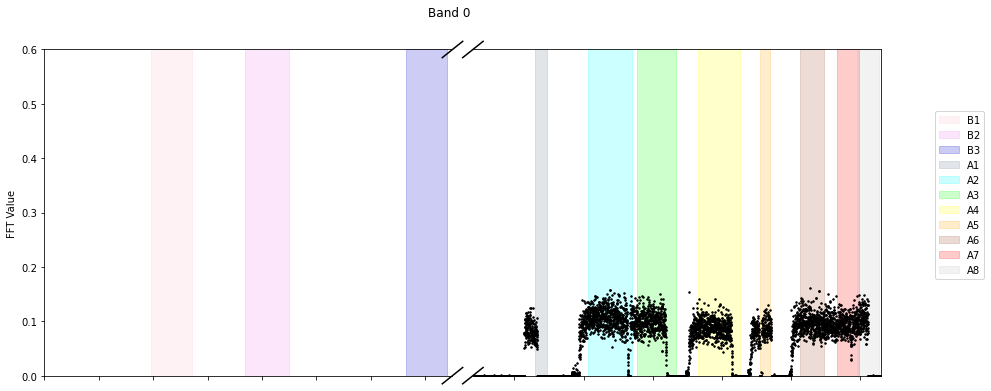

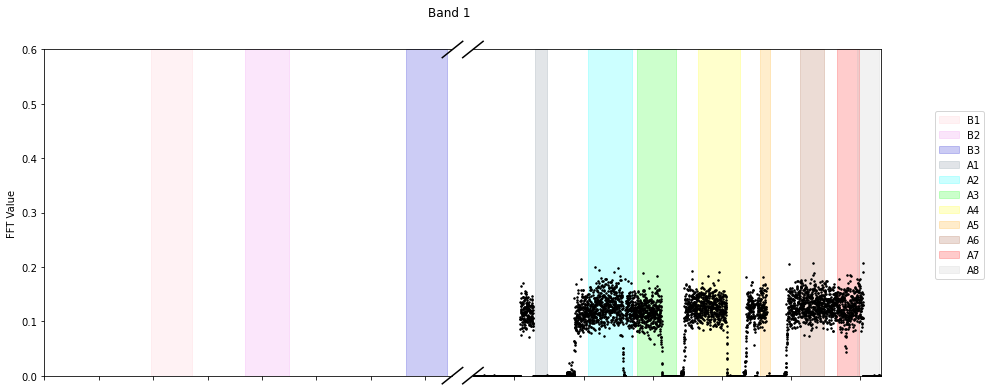

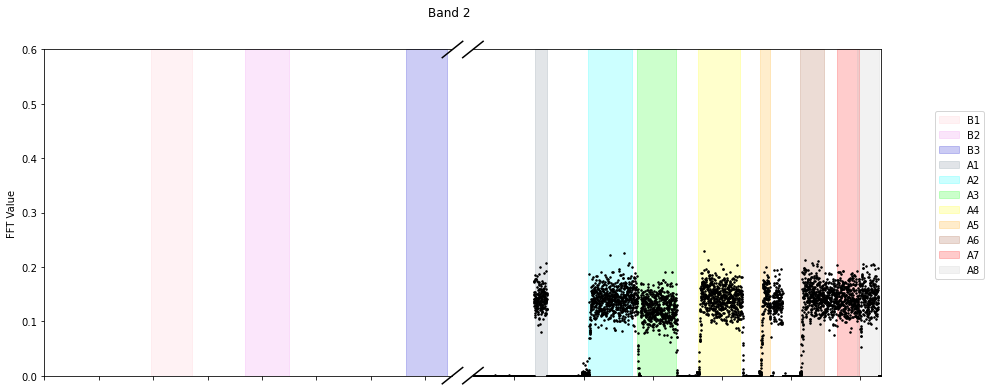

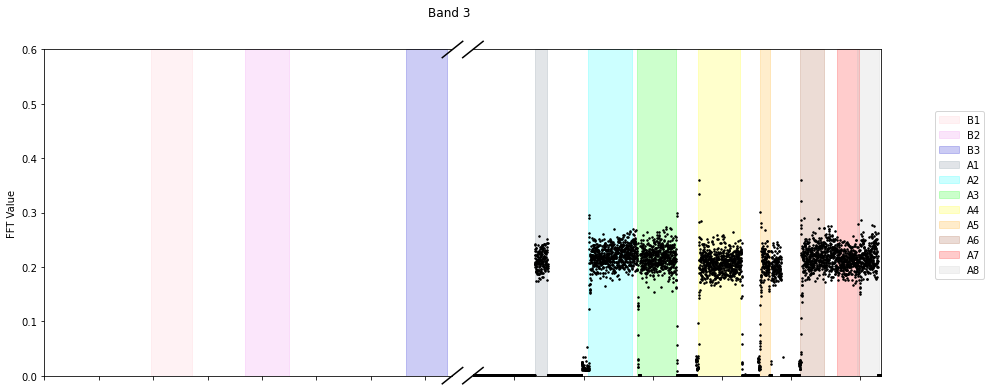

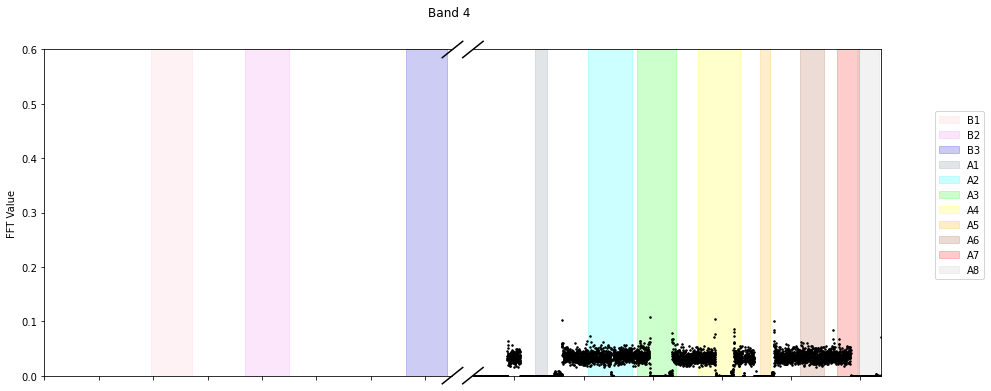

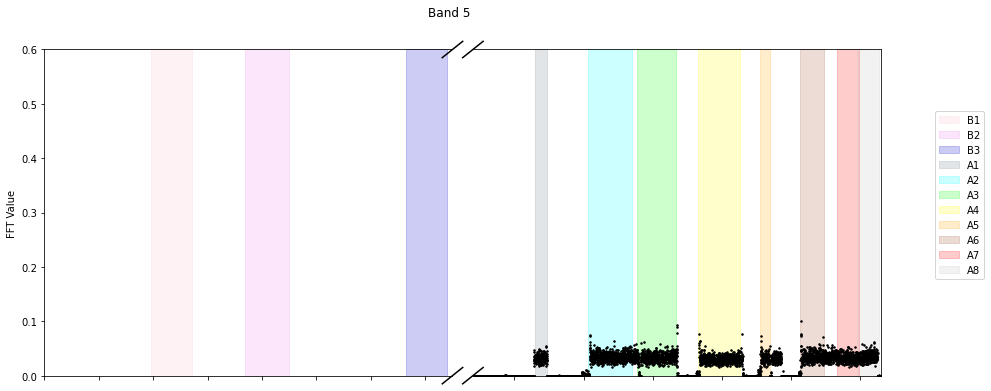

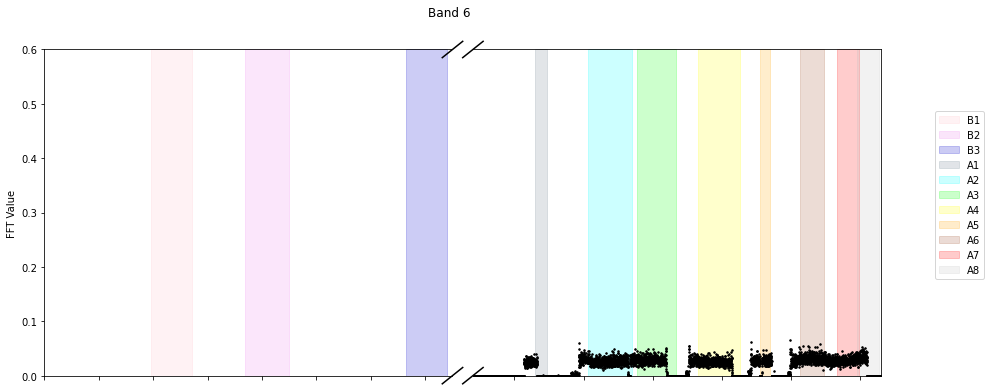

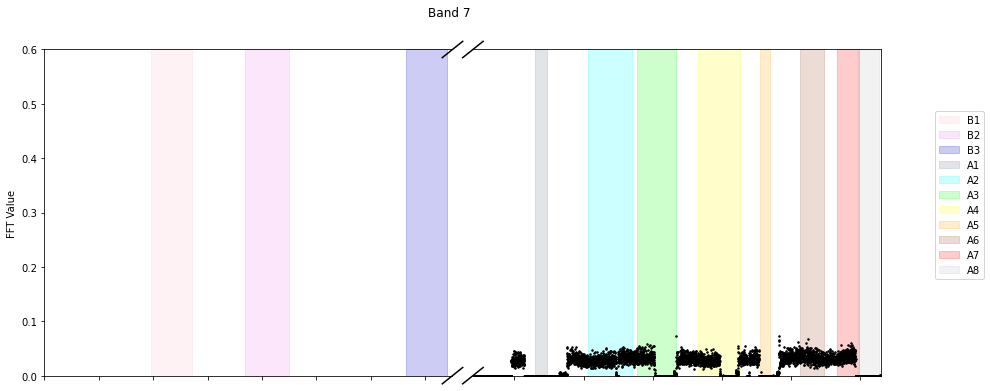

In [30]:
def fftbands(temp, title):
    
    fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))

    # print(temp.head())
    x = temp.index
    y = temp['Value']

    ax.set_ylabel('FFT Value', loc='center')

    ax2.tick_params(left = False, labelleft = False)


    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    #Set x and y axis limits
    ax.set_xticklabels([])
    ax2.set_xticklabels([])
    ax.set_xlim(0, 7500)
    ax2.set_xlim(22400, 28300)
    ax.set_ylim(0, 0.6)
    ax2.set_ylim(0, 0.6)

    d=0.025
    
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d,1+d), (-d,+d), **kwargs)
    ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes) 
    ax2.plot((-d,+d), (1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (-d,+d), **kwargs)


    ax.axvspan(1958, 2720, color='pink', alpha=0.2, label='B1')
    ax.axvspan(3693, 4500, color='violet', alpha=0.2, label='B2')
    ax.axvspan(6643, 7403, color='mediumblue', alpha=0.2, label='B3')
    ax2.axvspan(23300, 23475, color='slategrey', alpha=0.2, label='A1')
    ax2.axvspan(24061, 24695, color='cyan', alpha=0.2, label='A2')
    ax2.axvspan(24769, 25337, color='lime', alpha=0.2, label='A3')
    ax2.axvspan(25646, 26264, color='yellow', alpha=0.2, label='A4')
    ax2.axvspan(26553, 26694, color='orange', alpha=0.2, label='A5')
    ax2.axvspan(27132, 27477, color='sienna', alpha=0.2, label='A6')
    ax2.axvspan(27660, 27976, color='red', alpha=0.2, label='A7')
    ax2.axvspan(27953, 28262, color='silver', alpha=0.2, label='A8')

    fig.suptitle(title)
    #fig.xlabel('Frequency')
    fig.legend(loc='upper right', bbox_to_anchor=(1,0.75), markerscale=3)
    fig.subplots_adjust(wspace=0.05)


    # A = ax.plot(x, y, '.', color='black', markersize=3)
    B = ax2.plot(x, y, '.', color='black', markersize=3);
    
fftbands(fft_band0, 'Band 0')
fftbands(fft_band1, 'Band 1')
fftbands(fft_band2, 'Band 2')
fftbands(fft_band3, 'Band 3')
fftbands(fft_band4, 'Band 4')
fftbands(fft_band5, 'Band 5')
fftbands(fft_band6, 'Band 6')
fftbands(fft_band7, 'Band 7')